In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Download the zip file.

In [ ]:
!wget http://mlg.ucd.ie/modules/python/assign2/bank-data.zip

--2023-05-04 19:57:04--  http://mlg.ucd.ie/modules/python/assign2/bank-data.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110166 (108K) [application/zip]
Saving to: ‘bank-data.zip’

bank-data.zip       100%[===================>] 107.58K   170KB/s    in 0.6s    

2023-05-04 19:57:05 (170 KB/s) - ‘bank-data.zip’ saved [110166/110166]



## Unzip the zip file.

In [ ]:
!unzip bank-data.zip
!mv bank-data/* .

Archive:  bank-data.zip
   creating: bank-data/
  inflating: bank-data/bank-tabular.csv  
  inflating: bank-data/bank-comments.csv  
  inflating: bank-data/README.TXT    


## Read this csv file.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
customers = pd.read_csv("bank-tabular.csv", delimiter='\t')
customers

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


In [ ]:
customers.shape

(3000, 18)

In [ ]:
customers.columns

Index(['customer_id', 'date', 'customer_gender', 'customer_age',
       'customer_location', 'customer_type', 'has_cc', 'has_mortgage',
       'convenience', 'customer_service', 'online_banking', 'interest_rates',
       'fees_charges', 'community_involvement', 'products_services',
       'privacy_security', 'reputation', 'satisfied'],
      dtype='object')

In [ ]:
customers.isna().sum()

customer_id                0
date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

## Delete all rows that contain null values.

In [ ]:
customers_new=customers.dropna()
customers_new

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True


## Uniform gender format.

In [ ]:
customers_new.loc[customers_new.customer_gender=='f', 'customer_gender'] = 'Female'
customers_new.loc[customers_new.customer_gender=='m', 'customer_gender'] = 'Male'
customers_new

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True


In [ ]:
customers_new.dtypes

customer_id                int64
date                      object
customer_gender           object
customer_age             float64
customer_location         object
customer_type             object
has_cc                      bool
has_mortgage                bool
convenience              float64
customer_service         float64
online_banking           float64
interest_rates           float64
fees_charges             float64
community_involvement    float64
products_services        float64
privacy_security         float64
reputation               float64
satisfied                   bool
dtype: object

## View the number of different values for each column of data.

In [ ]:
print(customers_new.apply(lambda col: col.nunique()))

customer_id              1209
date                      569
customer_gender             4
customer_age               69
customer_location           4
customer_type               3
has_cc                      2
has_mortgage                2
convenience                 5
customer_service            5
online_banking              5
interest_rates              5
fees_charges                5
community_involvement       5
products_services           5
privacy_security            5
reputation                  5
satisfied                   2
dtype: int64


## View the gender representation.

In [ ]:
customers_new['customer_gender'].unique()

array(['Male', 'Female', 'Unspecified', 'Not specified'], dtype=object)

## Only the two genders, male and female, are retained.

In [ ]:
customers_new=customers_new[(customers_new['customer_gender']!='Unspecified')&(customers_new['customer_gender']!='Not specified')]

In [ ]:
customers_new['customer_gender'].unique()

array(['Male', 'Female'], dtype=object)

## See if there are redundant rows.

In [ ]:
customers_new.duplicated().any()

False

## See the relationship between age and each score.


*   The relationship with the highest degree of relationship is between customer service ratings and convenience ratings.
*   The second-ranked relationship is between product service and private security.



<Axes: >

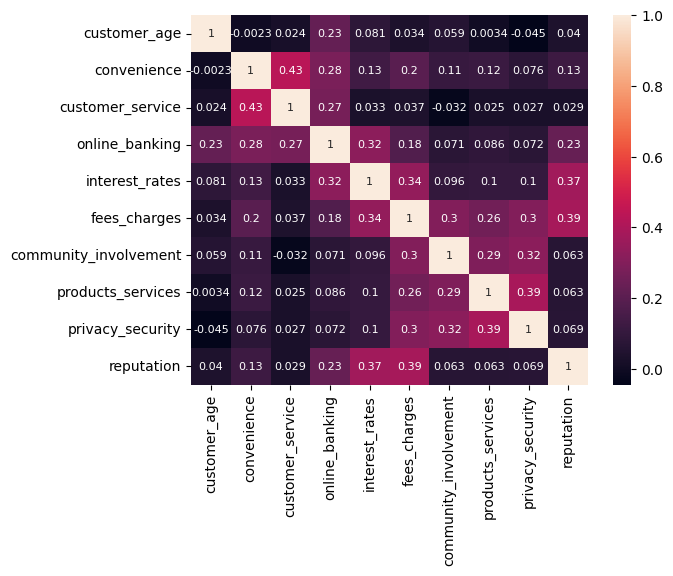

In [ ]:
customers_corr = customers_new[["customer_age","convenience","customer_service","online_banking","interest_rates","fees_charges","community_involvement","products_services","privacy_security","reputation"]]
corr = customers_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,annot_kws={"fontsize":8})

## Pick out the data of male customers.

In [ ]:
customers_male=customers_new[customers_new['customer_gender']=='Male']
customers_male

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
15,15145,2021-04-19,Male,54.0,Leinster,Business,True,False,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
26,364402,2021-05-18,Male,42.0,Munster,Business,True,False,1.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,False
30,368574,2021-04-24,Male,32.0,Leinster,Personal,True,False,1.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False
2986,144004,2022-01-09,Male,59.0,Connacht,Business,False,False,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,4.0,True
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False


## Sort all rows by time.

In [ ]:
customers_male_sortbydate = customers_male.sort_values(by=['date'])
customers_male_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Calculate the average of customer ratings for each section.

In [ ]:
customers_male_sortbydate['average']=(customers_male_sortbydate['convenience']+customers_male_sortbydate['customer_service']+customers_male_sortbydate['online_banking']+customers_male_sortbydate['interest_rates']+customers_male_sortbydate['fees_charges']+customers_male_sortbydate['community_involvement']+customers_male_sortbydate['products_services']+customers_male_sortbydate['privacy_security']+customers_male_sortbydate['reputation'])/9
customers_male_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True,3.333333
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False,2.777778
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True,4.000000
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True,4.222222
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True,4.444444
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True,3.777778
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True,3.444444
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False,3.111111


## Calculate the weekly average.

In [ ]:
date_average_male=customers_male_sortbydate['average']
date_average_male_df=date_average_male.groupby(np.arange(len(date_average_male))//7).mean().reset_index().rename(columns={0:'average'})
date_average_male_df['index']=date_average_male_df['index']+1
date_average_male_df
# date_average=customers_male_sortbydate.groupby('date')['average'].mean()
# date_average_df=date_average.to_frame().reset_index()
# a = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
# date_average_df['sequence']=np.array(a).reshape(-1,1)
# date_average_df

,index,average
0,1,3.539683
1,2,3.238095
2,3,3.396825
3,4,2.333333
4,5,2.555556
...,...,...
72,73,3.174603
73,74,3.158730
74,75,3.111111
75,76,3.285714


## Draw a trend graph for male customer.
* This graph indicates that the overall rating of banking services by male users
is in a slow state of growth.
#### **The next analysis contains the analysis of female users and the analysis of users in each region, etc. The issue of ideas will not be repeated.**

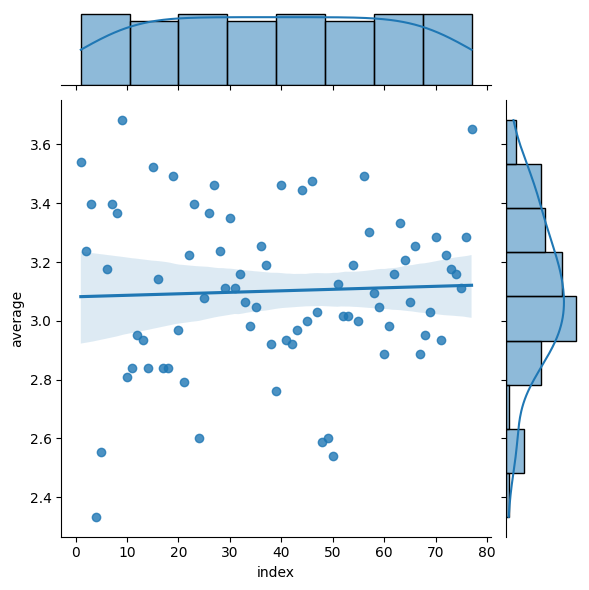

In [ ]:
sns.jointplot(data=date_average_male_df, y='average', x='index', kind='reg')

## Analysis of female users.

In [ ]:
customers_female=customers_new[customers_new['customer_gender']=='Female']
customers_female

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
9,304040,2021-02-02,Female,69.0,Connacht,Personal,True,True,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,False
13,312976,2021-06-21,Female,50.0,Munster,Business,True,False,4.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,381469,2021-06-12,Female,37.0,Leinster,Business,True,False,4.0,1.0,3.0,1.0,1.0,4.0,3.0,5.0,1.0,True
2988,198067,2022-10-21,Female,33.0,Munster,Business,True,False,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,False
2991,265456,2022-08-25,Female,64.0,Leinster,Business,False,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True


In [ ]:
customers_female_sortbydate = customers_female.sort_values(by=['date'])
customers_female_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True
1471,334487,2021-01-15,Female,37.0,Leinster,Business,True,True,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,363975,2022-12-12,Female,56.0,Leinster,Personal,True,False,2.0,1.0,4.0,4.0,3.0,2.0,2.0,2.0,5.0,True
1677,86732,2022-12-12,Female,46.0,Munster,Business,True,False,2.0,2.0,3.0,2.0,3.0,4.0,4.0,5.0,5.0,True
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False


In [ ]:
customers_female_sortbydate['average']=(customers_female_sortbydate['convenience']+customers_female_sortbydate['customer_service']+customers_female_sortbydate['online_banking']+customers_female_sortbydate['interest_rates']+customers_female_sortbydate['fees_charges']+customers_female_sortbydate['community_involvement']+customers_female_sortbydate['products_services']+customers_female_sortbydate['privacy_security']+customers_female_sortbydate['reputation'])/9
customers_female_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False,2.222222
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False,2.444444
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False,3.000000
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True,4.333333
1471,334487,2021-01-15,Female,37.0,Leinster,Business,True,True,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False,3.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,363975,2022-12-12,Female,56.0,Leinster,Personal,True,False,2.0,1.0,4.0,4.0,3.0,2.0,2.0,2.0,5.0,True,2.777778
1677,86732,2022-12-12,Female,46.0,Munster,Business,True,False,2.0,2.0,3.0,2.0,3.0,4.0,4.0,5.0,5.0,True,3.333333
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True,2.444444
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False,3.222222


In [ ]:
# customers_female_sortbydate.loc[:, 'date'] = pd.to_datetime(customers_female_sortbydate['date']).apply(lambda x: x.strftime('%Y-%m'))
# customers_female_sortbydate
date_average_female=customers_female_sortbydate['average']
date_average_female_df=date_average_female.groupby(np.arange(len(date_average_female))//7).mean().reset_index().rename(columns={0:'average'})
date_average_female_df['index']=date_average_female_df['index']+1
date_average_female_df

,index,average
0,1,3.253968
1,2,2.412698
2,3,2.984127
3,4,3.380952
4,5,3.555556
...,...,...
74,75,3.174603
75,76,2.984127
76,77,3.142857
77,78,2.793651


* The trend shows a slow decline in female users' ratings of banks, and a more discrete distribution of points.

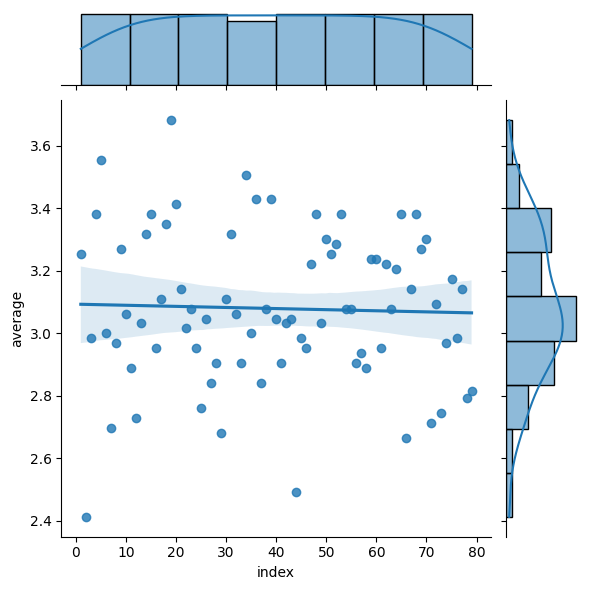

In [ ]:
sns.jointplot(data=date_average_female_df, y='average', x='index', kind='reg')

In [ ]:
customers_new['customer_location'].unique()

array(['Munster', 'Leinster', 'Connacht', 'Ulster'], dtype=object)

## Analysis of users in the Munster area.

In [ ]:
customers_area1=customers_new[customers_new['customer_location']=='Munster']
customers_area1

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
13,312976,2021-06-21,Female,50.0,Munster,Business,True,False,4.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,True
23,197632,2021-02-22,Female,54.0,Munster,Business,True,False,4.0,3.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,True
26,364402,2021-05-18,Male,42.0,Munster,Business,True,False,1.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,333301,2022-04-30,Female,52.0,Munster,Business,False,False,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,False
2977,265090,2022-01-10,Male,83.0,Munster,Business,True,False,1.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,False
2988,198067,2022-10-21,Female,33.0,Munster,Business,True,False,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,False
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False


In [ ]:
customers_area1_sortbydate = customers_area1.sort_values(by=['date'])
customers_area1_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False
2099,220654,2021-01-11,Male,43.0,Munster,Business,False,False,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,False
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False


In [ ]:
customers_area1_sortbydate['average']=(customers_area1_sortbydate['convenience']+customers_area1_sortbydate['customer_service']+customers_area1_sortbydate['online_banking']+customers_area1_sortbydate['interest_rates']+customers_area1_sortbydate['fees_charges']+customers_area1_sortbydate['community_involvement']+customers_area1_sortbydate['products_services']+customers_area1_sortbydate['privacy_security']+customers_area1_sortbydate['reputation'])/9
customers_area1_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False,2.444444
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True,4.222222
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False,3.333333
2099,220654,2021-01-11,Male,43.0,Munster,Business,False,False,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,False,2.888889
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True,4.444444
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True,3.777778
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True,2.444444
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False,3.111111


In [ ]:
date_average_area1=customers_area1_sortbydate['average']
date_average_area1_df=date_average_area1.groupby(np.arange(len(date_average_area1))//7).mean().reset_index().rename(columns={0:'average'})
date_average_area1_df['index']=date_average_area1_df['index']+1
date_average_area1_df

,index,average
0,1,3.317460
1,2,2.825397
2,3,2.746032
3,4,3.365079
4,5,3.126984
5,6,2.873016
6,7,3.238095
7,8,3.111111
8,9,3.015873
9,10,2.777778


* The trend in user ratings of banks in the Munster area is generally stable.

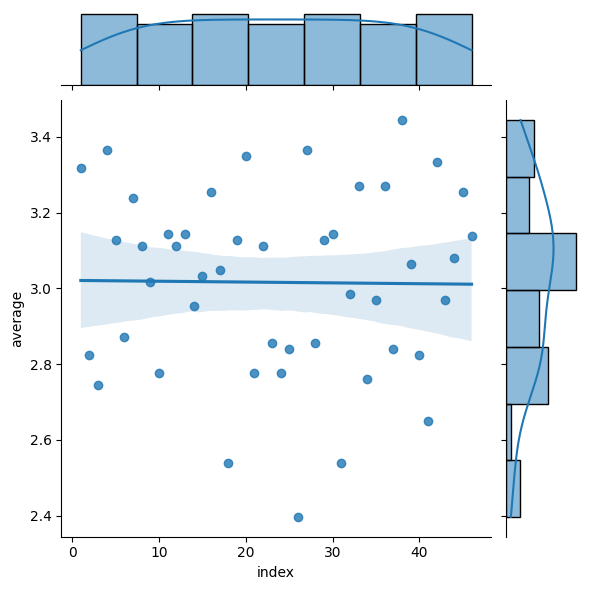

In [ ]:
sns.jointplot(data=date_average_area1_df, y='average', x='index', kind='reg')

## Analysis of users in the Leinster area.

In [ ]:
customers_area2=customers_new[customers_new['customer_location']=='Leinster']
customers_area2

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
15,15145,2021-04-19,Male,54.0,Leinster,Business,True,False,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
18,116340,2021-11-03,Female,32.0,Leinster,Personal,False,True,1.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,376731,2021-05-07,Female,49.0,Leinster,Business,True,False,1.0,1.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,True
2984,381469,2021-06-12,Female,37.0,Leinster,Business,True,False,4.0,1.0,3.0,1.0,1.0,4.0,3.0,5.0,1.0,True
2991,265456,2022-08-25,Female,64.0,Leinster,Business,False,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True


In [ ]:
customers_area2_sortbydate = customers_area2.sort_values(by=['date'])
customers_area2_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True
265,177476,2022-12-22,Female,32.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,False


In [ ]:
customers_area2_sortbydate['average']=(customers_area2_sortbydate['convenience']+customers_area2_sortbydate['customer_service']+customers_area2_sortbydate['online_banking']+customers_area2_sortbydate['interest_rates']+customers_area2_sortbydate['fees_charges']+customers_area2_sortbydate['community_involvement']+customers_area2_sortbydate['products_services']+customers_area2_sortbydate['privacy_security']+customers_area2_sortbydate['reputation'])/9
customers_area2_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True,3.333333
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False,2.222222
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True,4.000000
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False,2.777778
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True,2.888889
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False,3.111111
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True,3.444444
265,177476,2022-12-22,Female,32.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,False,1.888889


In [ ]:
date_average_area2=customers_area2_sortbydate['average']
date_average_area2_df=date_average_area2.groupby(np.arange(len(date_average_area2))//7).mean().reset_index().rename(columns={0:'average'})
date_average_area2_df['index']=date_average_area2_df['index']+1
date_average_area2_df

,index,average
0,1,3.111111
1,2,3.031746
2,3,2.650794
3,4,3.142857
4,5,3.698413
...,...,...
71,72,3.190476
72,73,3.301587
73,74,3.158730
74,75,2.873016


* The trend in user ratings in the Leinster area is essentially the same as the previous analysis of male users, both showing a slow increase.

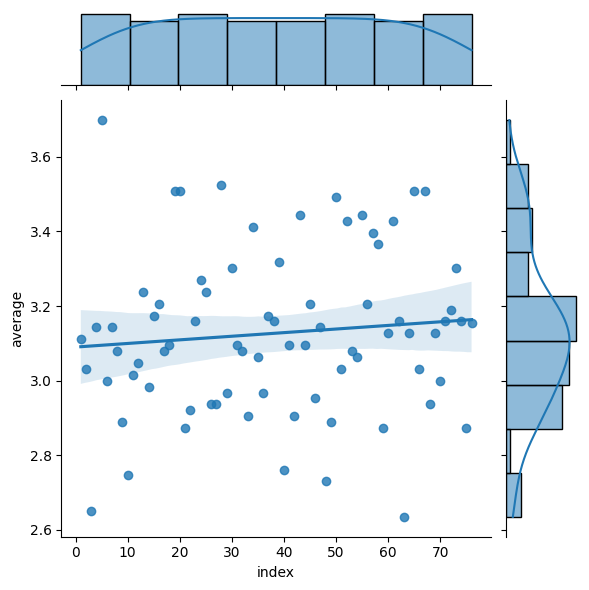

In [ ]:
sns.jointplot(data=date_average_area2_df, y='average', x='index', kind='reg')

## Analysis of Connacht users.

In [ ]:
customers_area3=customers_new[customers_new['customer_location']=='Connacht']
customers_area3

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
9,304040,2021-02-02,Female,69.0,Connacht,Personal,True,True,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,False
60,340384,2022-04-17,Male,52.0,Connacht,Business,True,False,3.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0,3.0,False
64,174005,2021-12-11,Male,53.0,Connacht,Business,True,False,2.0,2.0,5.0,3.0,4.0,4.0,4.0,4.0,1.0,True
114,316073,2021-11-20,Male,69.0,Connacht,Business,False,False,3.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,2.0,True
124,206149,2022-10-03,Female,73.0,Connacht,Business,True,False,3.0,3.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,339532,2022-05-14,Male,59.0,Connacht,Personal,True,False,3.0,3.0,5.0,5.0,1.0,4.0,4.0,4.0,3.0,True
2946,188193,2021-02-26,Female,50.0,Connacht,Personal,True,True,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,5.0,False
2956,76349,2021-11-13,Female,75.0,Connacht,Personal,True,False,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,False
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False


In [ ]:
customers_area3_sortbydate = customers_area3.sort_values(by=['date'])
customers_area3_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True
990,228571,2021-01-16,Male,33.0,Connacht,Personal,True,True,2.0,2.0,4.0,2.0,4.0,4.0,5.0,5.0,1.0,False
2426,15922,2021-01-18,Male,36.0,Connacht,Business,True,False,2.0,3.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,False
1572,286855,2021-01-19,Female,44.0,Connacht,Business,True,False,3.0,3.0,5.0,1.0,1.0,3.0,4.0,4.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False
2205,246543,2022-10-30,Female,42.0,Connacht,Business,True,False,5.0,4.0,3.0,5.0,5.0,3.0,1.0,3.0,5.0,True
2817,299421,2022-11-06,Female,57.0,Connacht,Personal,True,False,2.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0,False
255,369046,2022-12-02,Female,37.0,Connacht,Personal,True,True,4.0,4.0,1.0,2.0,2.0,3.0,5.0,4.0,1.0,False


In [ ]:
customers_area3_sortbydate['average']=(customers_area3_sortbydate['convenience']+customers_area3_sortbydate['customer_service']+customers_area3_sortbydate['online_banking']+customers_area3_sortbydate['interest_rates']+customers_area3_sortbydate['fees_charges']+customers_area3_sortbydate['community_involvement']+customers_area3_sortbydate['products_services']+customers_area3_sortbydate['privacy_security']+customers_area3_sortbydate['reputation'])/9
customers_area3_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False,3.000000
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True,2.777778
990,228571,2021-01-16,Male,33.0,Connacht,Personal,True,True,2.0,2.0,4.0,2.0,4.0,4.0,5.0,5.0,1.0,False,3.222222
2426,15922,2021-01-18,Male,36.0,Connacht,Business,True,False,2.0,3.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,False,2.555556
1572,286855,2021-01-19,Female,44.0,Connacht,Business,True,False,3.0,3.0,5.0,1.0,1.0,3.0,4.0,4.0,1.0,True,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False,2.444444
2205,246543,2022-10-30,Female,42.0,Connacht,Business,True,False,5.0,4.0,3.0,5.0,5.0,3.0,1.0,3.0,5.0,True,3.777778
2817,299421,2022-11-06,Female,57.0,Connacht,Personal,True,False,2.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0,False,3.111111
255,369046,2022-12-02,Female,37.0,Connacht,Personal,True,True,4.0,4.0,1.0,2.0,2.0,3.0,5.0,4.0,1.0,False,2.888889


In [ ]:
date_average_area3=customers_area3_sortbydate['average']
date_average_area3_df=date_average_area3.groupby(np.arange(len(date_average_area3))//7).mean().reset_index().rename(columns={0:'average'})
date_average_area3_df['index']=date_average_area3_df['index']+1
date_average_area3_df

,index,average
0,1,2.841270
1,2,3.365079
2,3,2.857143
3,4,2.825397
4,5,3.158730
5,6,2.984127
6,7,3.174603
7,8,2.571429
8,9,3.047619
9,10,3.507937


* Connacht users' rating of the bank is slowly decreasing, which is more similar to previous analysis of female users as a whole.

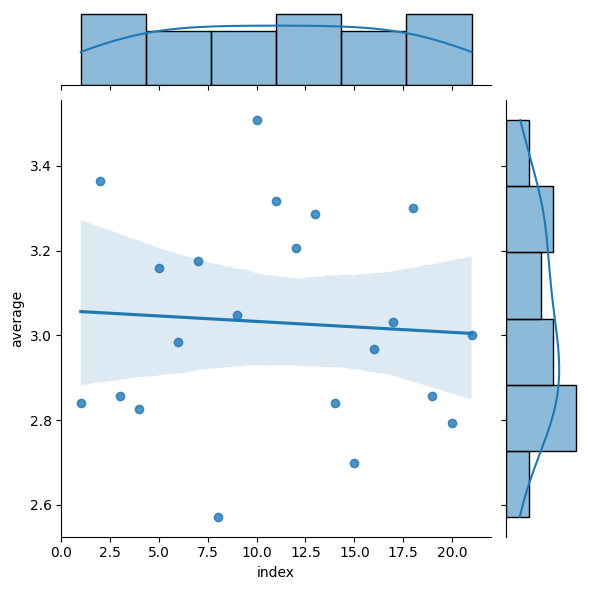

In [ ]:
sns.jointplot(data=date_average_area3_df, y='average', x='index', kind='reg')

## Analysis of users in the Ulster region.

In [ ]:
customers_area4=customers_new[customers_new['customer_location']=='Ulster']
customers_area4

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
19,313002,2022-08-15,Female,43.0,Ulster,Business,False,False,3.0,3.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,False
97,146677,2021-08-08,Female,50.0,Ulster,Business,True,True,3.0,3.0,5.0,3.0,5.0,5.0,4.0,5.0,1.0,False
105,202438,2021-10-21,Female,47.0,Ulster,Business,True,False,5.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,True
144,178722,2021-10-18,Female,32.0,Ulster,Business,True,False,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,True
189,6246,2021-07-07,Female,28.0,Ulster,Personal,True,False,2.0,2.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,188575,2021-01-16,Male,32.0,Ulster,Business,True,True,5.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,5.0,True
2848,177663,2022-03-26,Female,32.0,Ulster,Personal,True,False,1.0,1.0,3.0,3.0,1.0,5.0,4.0,2.0,3.0,False
2872,75605,2021-08-08,Female,39.0,Ulster,Business,True,False,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,False
2954,206163,2022-03-17,Female,26.0,Ulster,Personal,True,True,3.0,3.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,False


In [ ]:
customers_area4_sortbydate = customers_area4.sort_values(by=['date'])
customers_area4_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
822,348201,2021-01-10,Male,35.0,Ulster,Business,True,False,3.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,True
2005,28002,2021-01-13,Male,68.0,Ulster,Personal,True,False,3.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False
2799,188575,2021-01-16,Male,32.0,Ulster,Business,True,True,5.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,5.0,True
1336,141815,2021-01-29,Female,71.0,Ulster,Personal,False,True,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,4.0,False
862,235249,2021-02-19,Male,26.0,Ulster,Personal,True,False,1.0,1.0,1.0,2.0,2.0,4.0,3.0,4.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,58358,2022-10-07,Female,33.0,Ulster,Business,True,False,1.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,1.0,False
1550,340584,2022-10-08,Female,49.0,Ulster,Business,True,True,2.0,2.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,False
1092,112056,2022-10-14,Male,62.0,Ulster,Business,True,False,2.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,False
1167,5643,2022-12-03,Male,48.0,Ulster,Business,True,False,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True


In [ ]:
customers_area4_sortbydate['average']=(customers_area4_sortbydate['convenience']+customers_area4_sortbydate['customer_service']+customers_area4_sortbydate['online_banking']+customers_area4_sortbydate['interest_rates']+customers_area4_sortbydate['fees_charges']+customers_area4_sortbydate['community_involvement']+customers_area4_sortbydate['products_services']+customers_area4_sortbydate['privacy_security']+customers_area4_sortbydate['reputation'])/9
customers_area4_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
822,348201,2021-01-10,Male,35.0,Ulster,Business,True,False,3.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,True,4.333333
2005,28002,2021-01-13,Male,68.0,Ulster,Personal,True,False,3.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False,3.444444
2799,188575,2021-01-16,Male,32.0,Ulster,Business,True,True,5.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,5.0,True,4.333333
1336,141815,2021-01-29,Female,71.0,Ulster,Personal,False,True,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,4.0,False,2.111111
862,235249,2021-02-19,Male,26.0,Ulster,Personal,True,False,1.0,1.0,1.0,2.0,2.0,4.0,3.0,4.0,4.0,False,2.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,58358,2022-10-07,Female,33.0,Ulster,Business,True,False,1.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,1.0,False,2.222222
1550,340584,2022-10-08,Female,49.0,Ulster,Business,True,True,2.0,2.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,False,3.000000
1092,112056,2022-10-14,Male,62.0,Ulster,Business,True,False,2.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,False,2.333333
1167,5643,2022-12-03,Male,48.0,Ulster,Business,True,False,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True,3.444444


In [ ]:
date_average_area4=customers_area4_sortbydate['average']
date_average_area4_df=date_average_area4.groupby(np.arange(len(date_average_area4))//7).mean().reset_index().rename(columns={0:'average'})
date_average_area4_df['index']=date_average_area4_df['index']+1
date_average_area4_df

,index,average
0,1,3.571429
1,2,2.888889
2,3,3.809524
3,4,3.539683
4,5,3.000000
5,6,3.015873
6,7,3.492063
7,8,2.968254
8,9,3.111111
9,10,2.730159


* There is a significant downward trend in the rating of banks by users in the Ulster region.

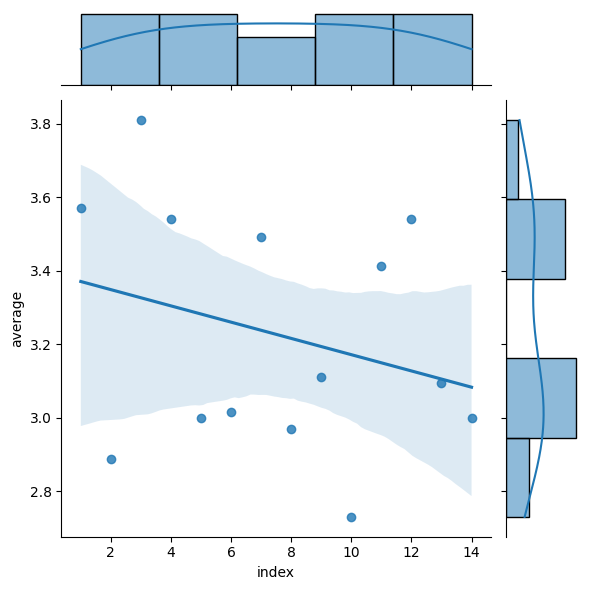

In [ ]:
sns.jointplot(data=date_average_area4_df, y='average', x='index', kind='reg')

In [ ]:
customers_new['customer_type'].unique()

array(['Personal', 'Business', 'Business-Plus'], dtype=object)

## Analysis of personal users.

In [ ]:
customers_type1=customers_new[customers_new['customer_type']=='Personal']
customers_type1

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
9,304040,2021-02-02,Female,69.0,Connacht,Personal,True,True,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,301520,2022-04-15,Female,53.0,Leinster,Personal,True,True,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,False
2972,346357,2022-05-08,Male,58.0,Leinster,Personal,True,True,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,4.0,False
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True


In [ ]:
customers_type1_sortbydate = customers_type1.sort_values(by=['date'])
customers_type1_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False
2005,28002,2021-01-13,Male,68.0,Ulster,Personal,True,False,3.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False
1705,51351,2021-01-14,Male,56.0,Munster,Personal,False,False,2.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False
2386,121508,2022-12-15,Male,48.0,Munster,Personal,True,False,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,False
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False


In [ ]:
customers_type1_sortbydate['average']=(customers_type1_sortbydate['convenience']+customers_type1_sortbydate['customer_service']+customers_type1_sortbydate['online_banking']+customers_type1_sortbydate['interest_rates']+customers_type1_sortbydate['fees_charges']+customers_type1_sortbydate['community_involvement']+customers_type1_sortbydate['products_services']+customers_type1_sortbydate['privacy_security']+customers_type1_sortbydate['reputation'])/9
customers_type1_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False,2.222222
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False,2.777778
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False,2.777778
2005,28002,2021-01-13,Male,68.0,Ulster,Personal,True,False,3.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False,3.444444
1705,51351,2021-01-14,Male,56.0,Munster,Personal,False,False,2.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0,1.0,False,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False,3.111111
2386,121508,2022-12-15,Male,48.0,Munster,Personal,True,False,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,False,3.222222
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False,3.222222
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False,3.111111


In [ ]:
date_average_type1=customers_type1_sortbydate['average']
date_average_type1_df=date_average_type1.groupby(np.arange(len(date_average_type1))//7).mean().reset_index().rename(columns={0:'average'})
date_average_type1_df['index']=date_average_type1_df['index']+1
date_average_type1_df

,index,average
0,1,3.000000
1,2,2.476190
2,3,2.349206
3,4,3.095238
4,5,3.793651
...,...,...
68,69,3.126984
69,70,3.063492
70,71,3.269841
71,72,3.317460


* Overall, there is a gradual upward trend in the rating of banks by private users.

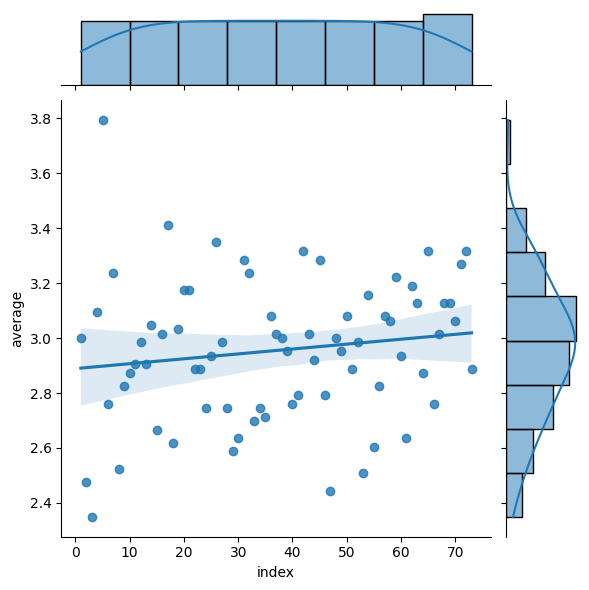

In [ ]:
sns.jointplot(data=date_average_type1_df, y='average', x='index', kind='reg')

## Analysis of business users.

In [ ]:
customers_type2=customers_new[customers_new['customer_type']=='Business']
customers_type2

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
13,312976,2021-06-21,Female,50.0,Munster,Business,True,False,4.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,True
15,15145,2021-04-19,Male,54.0,Leinster,Business,True,False,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
19,313002,2022-08-15,Female,43.0,Ulster,Business,False,False,3.0,3.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,False
23,197632,2021-02-22,Female,54.0,Munster,Business,True,False,4.0,3.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,198067,2022-10-21,Female,33.0,Munster,Business,True,False,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,False
2991,265456,2022-08-25,Female,64.0,Leinster,Business,False,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True


In [ ]:
customers_type2_sortbydate = customers_type2.sort_values(by=['date'])
customers_type2_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True


In [ ]:
customers_type2_sortbydate['average']=(customers_type2_sortbydate['convenience']+customers_type2_sortbydate['customer_service']+customers_type2_sortbydate['online_banking']+customers_type2_sortbydate['interest_rates']+customers_type2_sortbydate['fees_charges']+customers_type2_sortbydate['community_involvement']+customers_type2_sortbydate['products_services']+customers_type2_sortbydate['privacy_security']+customers_type2_sortbydate['reputation'])/9
customers_type2_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True,3.333333
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True,4.000000
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True,4.222222
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False,3.000000
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True,2.888889
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True,4.444444
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True,3.444444
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True,2.444444


In [ ]:
date_average_type2=customers_type2_sortbydate['average']
date_average_type2_df=date_average_type2.groupby(np.arange(len(date_average_type2))//7).mean().reset_index().rename(columns={0:'average'})
date_average_type2_df['index']=date_average_type2_df['index']+1
date_average_type2_df

,index,average
0,1,3.571429
1,2,3.412698
2,3,2.809524
3,4,3.126984
4,5,2.888889
...,...,...
72,73,3.142857
73,74,3.079365
74,75,2.984127
75,76,3.269841


* The rating of banks by business users is showing its slow downward trend.

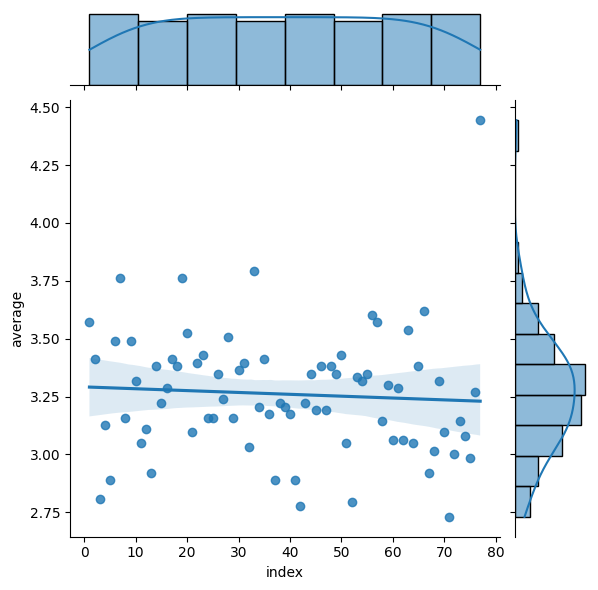

In [ ]:
sns.jointplot(data=date_average_type2_df, y='average', x='index', kind='reg')

## Analysis of super business users.

In [ ]:
customers_type3=customers_new[customers_new['customer_type']=='Business-Plus']
customers_type3

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
70,368309,2021-08-09,Male,39.0,Leinster,Business-Plus,True,False,4.0,4.0,2.0,4.0,4.0,1.0,2.0,3.0,4.0,True
141,95783,2021-08-15,Male,24.0,Munster,Business-Plus,True,True,4.0,1.0,4.0,2.0,1.0,4.0,5.0,1.0,3.0,False
150,178555,2022-03-10,Female,61.0,Leinster,Business-Plus,False,False,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,1.0,False
216,379905,2021-04-13,Female,44.0,Leinster,Business-Plus,True,False,4.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,True
281,297348,2021-05-21,Male,25.0,Connacht,Business-Plus,True,True,1.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,5.0,False
300,22826,2021-09-26,Male,59.0,Ulster,Business-Plus,True,False,2.0,1.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0,True
344,193952,2021-11-21,Female,41.0,Connacht,Business-Plus,False,False,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,False
418,67722,2021-03-25,Male,73.0,Connacht,Business-Plus,True,True,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,4.0,False
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
826,115120,2021-04-30,Male,46.0,Leinster,Business-Plus,True,False,4.0,5.0,4.0,4.0,2.0,1.0,2.0,5.0,3.0,True


In [ ]:
customers_type3_sortbydate = customers_type3.sort_values(by=['date'])
customers_type3_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True
1889,301213,2021-02-21,Female,40.0,Munster,Business-Plus,True,True,3.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,False
1648,352983,2021-03-03,Female,52.0,Leinster,Business-Plus,False,True,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,False
2419,252888,2021-03-09,Male,57.0,Leinster,Business-Plus,True,False,2.0,4.0,2.0,2.0,2.0,4.0,3.0,3.0,2.0,False
890,261134,2021-03-21,Male,32.0,Munster,Business-Plus,True,False,2.0,2.0,2.0,3.0,3.0,4.0,1.0,3.0,3.0,True
418,67722,2021-03-25,Male,73.0,Connacht,Business-Plus,True,True,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,4.0,False
1366,22138,2021-04-03,Male,59.0,Leinster,Business-Plus,True,False,2.0,3.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,False
216,379905,2021-04-13,Female,44.0,Leinster,Business-Plus,True,False,4.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,True
2433,92061,2021-04-28,Male,40.0,Munster,Business-Plus,True,True,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,1.0,False


In [ ]:
customers_type3_sortbydate['average']=(customers_type3_sortbydate['convenience']+customers_type3_sortbydate['customer_service']+customers_type3_sortbydate['online_banking']+customers_type3_sortbydate['interest_rates']+customers_type3_sortbydate['fees_charges']+customers_type3_sortbydate['community_involvement']+customers_type3_sortbydate['products_services']+customers_type3_sortbydate['privacy_security']+customers_type3_sortbydate['reputation'])/9
customers_type3_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False,2.444444
1937,29793,2021-01-12,Female,32.0,Munster,Business-Plus,True,False,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0,4.0,True,4.333333
1889,301213,2021-02-21,Female,40.0,Munster,Business-Plus,True,True,3.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,False,2.333333
1648,352983,2021-03-03,Female,52.0,Leinster,Business-Plus,False,True,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,False,2.888889
2419,252888,2021-03-09,Male,57.0,Leinster,Business-Plus,True,False,2.0,4.0,2.0,2.0,2.0,4.0,3.0,3.0,2.0,False,2.666667
890,261134,2021-03-21,Male,32.0,Munster,Business-Plus,True,False,2.0,2.0,2.0,3.0,3.0,4.0,1.0,3.0,3.0,True,2.555556
418,67722,2021-03-25,Male,73.0,Connacht,Business-Plus,True,True,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,4.0,False,3.222222
1366,22138,2021-04-03,Male,59.0,Leinster,Business-Plus,True,False,2.0,3.0,4.0,1.0,2.0,3.0,4.0,3.0,4.0,False,2.888889
216,379905,2021-04-13,Female,44.0,Leinster,Business-Plus,True,False,4.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,True,3.555556
2433,92061,2021-04-28,Male,40.0,Munster,Business-Plus,True,True,2.0,2.0,2.0,3.0,3.0,3.0,1.0,3.0,1.0,False,2.222222


In [ ]:
date_average_type3=customers_type3_sortbydate['average']
date_average_type3_df=date_average_type3.groupby(np.arange(len(date_average_type3))//7).mean().reset_index().rename(columns={0:'average'})
date_average_type3_df['index']=date_average_type3_df['index']+1
date_average_type3_df

,index,average
0,1,2.920635
1,2,2.825397
2,3,2.873016
3,4,2.793651
4,5,2.444444
5,6,2.873016
6,7,2.814815


* There is a general downward trend in the rating of banks by super business users.

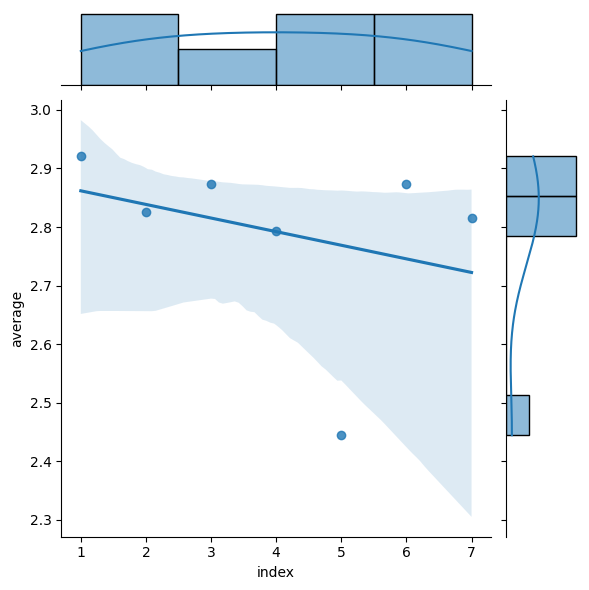

In [ ]:
sns.jointplot(data=date_average_type3_df, y='average', x='index', kind='reg')

In [ ]:
customers_new['has_cc'].unique()

array([ True, False])

## Analysis of users with credit cards.

In [ ]:
customers_cc_true=customers_new[customers_new['has_cc']==True]
customers_cc_true

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
9,304040,2021-02-02,Female,69.0,Connacht,Personal,True,True,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,381469,2021-06-12,Female,37.0,Leinster,Business,True,False,4.0,1.0,3.0,1.0,1.0,4.0,3.0,5.0,1.0,True
2988,198067,2022-10-21,Female,33.0,Munster,Business,True,False,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,False
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True


In [ ]:
customers_cc_true_sortbydate = customers_cc_true.sort_values(by=['date'])
customers_cc_true_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False
265,177476,2022-12-22,Female,32.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,False


In [ ]:
customers_cc_true_sortbydate['average']=(customers_cc_true_sortbydate['convenience']+customers_cc_true_sortbydate['customer_service']+customers_cc_true_sortbydate['online_banking']+customers_cc_true_sortbydate['interest_rates']+customers_cc_true_sortbydate['fees_charges']+customers_cc_true_sortbydate['community_involvement']+customers_cc_true_sortbydate['products_services']+customers_cc_true_sortbydate['privacy_security']+customers_cc_true_sortbydate['reputation'])/9
customers_cc_true_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False,2.222222
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False,2.444444
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True,4.000000
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True,4.222222
1462,165362,2021-01-09,Female,32.0,Connacht,Business,True,False,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,False,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True,3.444444
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True,2.444444
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False,3.222222
265,177476,2022-12-22,Female,32.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,2.0,False,1.888889


In [ ]:
date_average_cc_true=customers_cc_true_sortbydate['average']
date_average_cc_true_df=date_average_cc_true.groupby(np.arange(len(date_average_cc_true))//7).mean().reset_index().rename(columns={0:'average'})
date_average_cc_true_df['index']=date_average_cc_true_df['index']+1
date_average_cc_true_df

,index,average
0,1,3.142857
1,2,3.539683
2,3,3.412698
3,4,2.571429
4,5,2.793651
...,...,...
125,126,2.936508
126,127,3.126984
127,128,2.952381
128,129,3.365079


* The evaluation of banks by credit card holders is basically at a plateau.

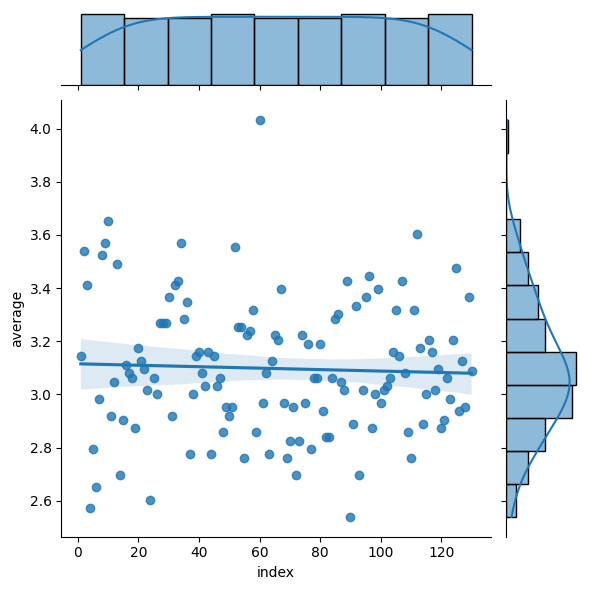

In [ ]:
sns.jointplot(data=date_average_cc_true_df, y='average', x='index', kind='reg')

## Analysis of users who do not hold a credit card.

In [ ]:
customers_cc_false=customers_new[customers_new['has_cc']==False]
customers_cc_false

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
18,116340,2021-11-03,Female,32.0,Leinster,Personal,False,True,1.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,3.0,False
19,313002,2022-08-15,Female,43.0,Ulster,Business,False,False,3.0,3.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,False
43,82997,2021-10-25,Male,41.0,Leinster,Business,False,False,3.0,4.0,1.0,1.0,3.0,4.0,3.0,3.0,3.0,False
55,164681,2021-06-26,Male,54.0,Leinster,Personal,False,False,2.0,3.0,2.0,2.0,2.0,1.0,4.0,4.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,333301,2022-04-30,Female,52.0,Munster,Business,False,False,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,False
2986,144004,2022-01-09,Male,59.0,Connacht,Business,False,False,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,4.0,True
2991,265456,2022-08-25,Female,64.0,Leinster,Business,False,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,True
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True


In [ ]:
customers_cc_false_sortbydate = customers_cc_false.sort_values(by=['date'])
customers_cc_false_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False
2099,220654,2021-01-11,Male,43.0,Munster,Business,False,False,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,False
2677,333399,2021-01-12,Male,58.0,Munster,Business,False,False,5.0,5.0,5.0,2.0,3.0,3.0,3.0,3.0,1.0,True
1705,51351,2021-01-14,Male,56.0,Munster,Personal,False,False,2.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,172305,2022-11-21,Male,51.0,Leinster,Business,False,False,2.0,2.0,3.0,4.0,1.0,2.0,4.0,4.0,5.0,True
1066,177282,2022-11-23,Male,81.0,Leinster,Personal,False,False,3.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,3.0,False
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True


In [ ]:
customers_cc_false_sortbydate['average']=(customers_cc_false_sortbydate['convenience']+customers_cc_false_sortbydate['customer_service']+customers_cc_false_sortbydate['online_banking']+customers_cc_false_sortbydate['interest_rates']+customers_cc_false_sortbydate['fees_charges']+customers_cc_false_sortbydate['community_involvement']+customers_cc_false_sortbydate['products_services']+customers_cc_false_sortbydate['privacy_security']+customers_cc_false_sortbydate['reputation'])/9
customers_cc_false_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True,3.333333
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False,2.777778
2099,220654,2021-01-11,Male,43.0,Munster,Business,False,False,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,False,2.888889
2677,333399,2021-01-12,Male,58.0,Munster,Business,False,False,5.0,5.0,5.0,2.0,3.0,3.0,3.0,3.0,1.0,True,3.333333
1705,51351,2021-01-14,Male,56.0,Munster,Personal,False,False,2.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0,1.0,False,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,172305,2022-11-21,Male,51.0,Leinster,Business,False,False,2.0,2.0,3.0,4.0,1.0,2.0,4.0,4.0,5.0,True,3.000000
1066,177282,2022-11-23,Male,81.0,Leinster,Personal,False,False,3.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,3.0,False,3.111111
2093,175330,2022-12-12,Male,37.0,Leinster,Business,False,False,4.0,2.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,True,2.888889
1147,355878,2022-12-16,Male,54.0,Munster,Business-Plus,False,False,5.0,2.0,1.0,2.0,5.0,5.0,5.0,5.0,4.0,True,3.777778


In [ ]:
date_average_cc_false=customers_cc_false_sortbydate['average']
date_average_cc_false_df=date_average_cc_false.groupby(np.arange(len(date_average_cc_false))//7).mean().reset_index().rename(columns={0:'average'})
date_average_cc_false_df['index']=date_average_cc_false_df['index']+1
date_average_cc_false_df

,index,average
0,1,2.857143
1,2,2.888889
2,3,3.079365
3,4,2.698413
4,5,3.333333
5,6,2.841270
6,7,2.587302
7,8,3.333333
8,9,3.301587
9,10,3.142857


* The rating of banks by users who do not hold credit cards is generally on the rise.

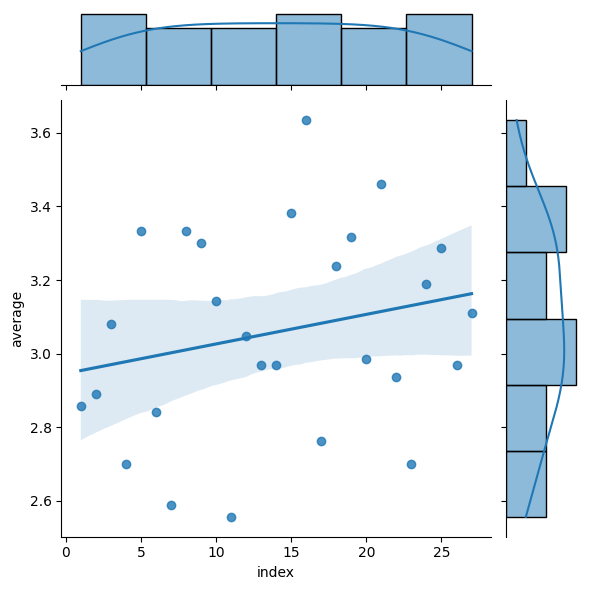

In [ ]:
sns.jointplot(data=date_average_cc_false_df, y='average', x='index', kind='reg')

## Analysis of users without mortgage loans.

In [ ]:
customers_mortgage_false=customers_new[customers_new['has_mortgage']==False]
customers_mortgage_false

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
7,145660,2022-10-21,Female,46.0,Munster,Business,False,False,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,True
8,219361,2021-09-25,Male,65.0,Leinster,Personal,True,False,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,True
13,312976,2021-06-21,Female,50.0,Munster,Business,True,False,4.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,265456,2022-08-25,Female,64.0,Leinster,Business,False,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,True
2992,122930,2021-03-11,Male,65.0,Ulster,Personal,True,False,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,True
2994,37855,2021-10-08,Female,35.0,Leinster,Business,True,False,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,True
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True


In [ ]:
customers_mortgage_false_sortbydate = customers_mortgage_false.sort_values(by=['date'])
customers_mortgage_false_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False


In [ ]:
customers_mortgage_false_sortbydate['average']=(customers_mortgage_false_sortbydate['convenience']+customers_mortgage_false_sortbydate['customer_service']+customers_mortgage_false_sortbydate['online_banking']+customers_mortgage_false_sortbydate['interest_rates']+customers_mortgage_false_sortbydate['fees_charges']+customers_mortgage_false_sortbydate['community_involvement']+customers_mortgage_false_sortbydate['products_services']+customers_mortgage_false_sortbydate['privacy_security']+customers_mortgage_false_sortbydate['reputation'])/9
customers_mortgage_false_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
2671,318258,2021-01-06,Male,26.0,Leinster,Business,False,False,3.0,3.0,4.0,4.0,3.0,3.0,1.0,5.0,4.0,True,3.333333
230,184235,2021-01-07,Male,57.0,Leinster,Business,True,False,4.0,4.0,4.0,3.0,5.0,5.0,2.0,5.0,4.0,True,4.000000
2739,164403,2021-01-08,Male,62.0,Munster,Business,True,False,5.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,True,4.222222
904,137410,2021-01-09,Male,22.0,Connacht,Business,True,False,4.0,4.0,1.0,3.0,3.0,1.0,1.0,5.0,3.0,True,2.777778
1999,46723,2021-01-09,Male,41.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,4.0,False,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,15669,2022-12-16,Male,66.0,Munster,Business,True,False,3.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,True,4.444444
72,84570,2022-12-17,Male,61.0,Leinster,Business,True,False,3.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,True,3.444444
1974,129254,2022-12-18,Female,33.0,Munster,Business,True,False,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,4.0,True,2.444444
2445,376072,2022-12-20,Male,60.0,Munster,Personal,False,False,3.0,5.0,3.0,3.0,3.0,1.0,4.0,3.0,3.0,False,3.111111


In [ ]:
date_average_mortgage_false=customers_mortgage_false_sortbydate['average']
date_average_mortgage_false_df=date_average_mortgage_false.groupby(np.arange(len(date_average_mortgage_false))//7).mean().reset_index().rename(columns={0:'average'})
date_average_mortgage_false_df['index']=date_average_mortgage_false_df['index']+1
date_average_mortgage_false_df

,index,average
0,1,3.571429
1,2,3.460317
2,3,3.015873
3,4,2.682540
4,5,3.031746
...,...,...
104,105,3.158730
105,106,3.460317
106,107,3.015873
107,108,3.365079


* Mortgage-free loan users are at a plateau in their evaluation of the bank.

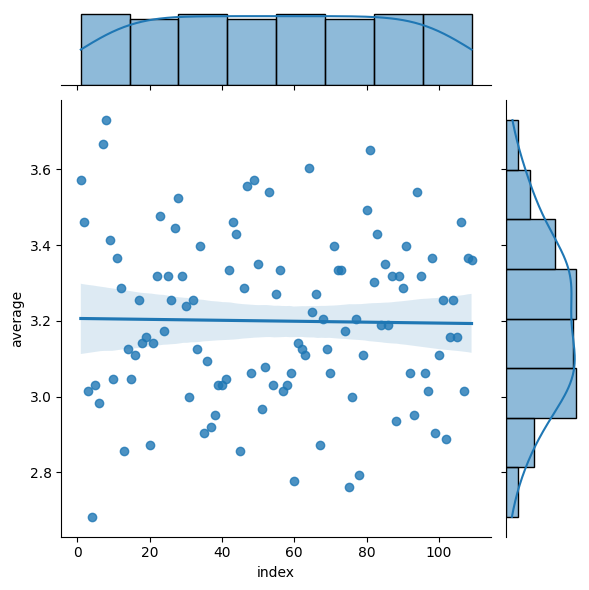

In [ ]:
sns.jointplot(data=date_average_mortgage_false_df, y='average', x='index', kind='reg')

## Analysis of users with mortgage loans.

In [ ]:
customers_mortgage_true=customers_new[customers_new['has_mortgage']==True]
customers_mortgage_true

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
9,304040,2021-02-02,Female,69.0,Connacht,Personal,True,True,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,False
18,116340,2021-11-03,Female,32.0,Leinster,Personal,False,True,1.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,3.0,False
27,304819,2022-01-24,Female,55.0,Leinster,Personal,True,True,2.0,3.0,3.0,3.0,5.0,3.0,4.0,4.0,5.0,False
44,142069,2022-04-04,Male,24.0,Leinster,Personal,True,True,2.0,2.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,301520,2022-04-15,Female,53.0,Leinster,Personal,True,True,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,False
2972,346357,2022-05-08,Male,58.0,Leinster,Personal,True,True,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,4.0,False
2974,379114,2022-10-05,Female,23.0,Leinster,Business-Plus,True,True,4.0,3.0,3.0,4.0,1.0,3.0,4.0,4.0,1.0,False
2978,120816,2022-10-28,Male,25.0,Connacht,Personal,True,True,3.0,3.0,3.0,1.0,2.0,1.0,4.0,3.0,2.0,False


In [ ]:
customers_mortgage_true_sortbydate = customers_mortgage_true.sort_values(by=['date'])
customers_mortgage_true_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False
1471,334487,2021-01-15,Female,37.0,Leinster,Business,True,True,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,178213,2022-12-11,Female,74.0,Leinster,Personal,True,True,4.0,2.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,False
2680,374499,2022-12-11,Female,74.0,Munster,Personal,True,True,1.0,1.0,4.0,3.0,5.0,5.0,5.0,5.0,3.0,False
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False


In [ ]:
customers_mortgage_true_sortbydate['average']=(customers_mortgage_true_sortbydate['convenience']+customers_mortgage_true_sortbydate['customer_service']+customers_mortgage_true_sortbydate['online_banking']+customers_mortgage_true_sortbydate['interest_rates']+customers_mortgage_true_sortbydate['fees_charges']+customers_mortgage_true_sortbydate['community_involvement']+customers_mortgage_true_sortbydate['products_services']+customers_mortgage_true_sortbydate['privacy_security']+customers_mortgage_true_sortbydate['reputation'])/9
customers_mortgage_true_sortbydate

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,average
876,331037,2021-01-06,Female,27.0,Leinster,Personal,True,True,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,False,2.222222
726,353558,2021-01-07,Female,25.0,Munster,Business-Plus,True,True,2.0,4.0,4.0,2.0,3.0,1.0,3.0,1.0,2.0,False,2.444444
2696,36274,2021-01-07,Male,53.0,Leinster,Personal,False,True,3.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,1.0,False,2.777778
2695,385916,2021-01-11,Male,57.0,Leinster,Personal,True,True,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,False,2.777778
1471,334487,2021-01-15,Female,37.0,Leinster,Business,True,True,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,False,3.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,178213,2022-12-11,Female,74.0,Leinster,Personal,True,True,4.0,2.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,False,3.222222
2680,374499,2022-12-11,Female,74.0,Munster,Personal,True,True,1.0,1.0,4.0,3.0,5.0,5.0,5.0,5.0,3.0,False,3.555556
85,215074,2022-12-13,Male,58.0,Leinster,Personal,True,True,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,False,3.111111
316,22749,2022-12-20,Female,50.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,False,3.222222


In [ ]:
date_average_mortgage_true=customers_mortgage_true_sortbydate['average']
date_average_mortgage_true_df=date_average_mortgage_true.groupby(np.arange(len(date_average_mortgage_true))//7).mean().reset_index().rename(columns={0:'average'})
date_average_mortgage_true_df['index']=date_average_mortgage_true_df['index']+1
date_average_mortgage_true_df

,index,average
0,1,3.000000
1,2,2.650794
2,3,2.301587
3,4,3.063492
4,5,2.349206
5,6,3.000000
6,7,2.936508
7,8,2.968254
8,9,2.952381
9,10,2.587302


* There is a slow rise in the rating of banks by mortgage loan users.

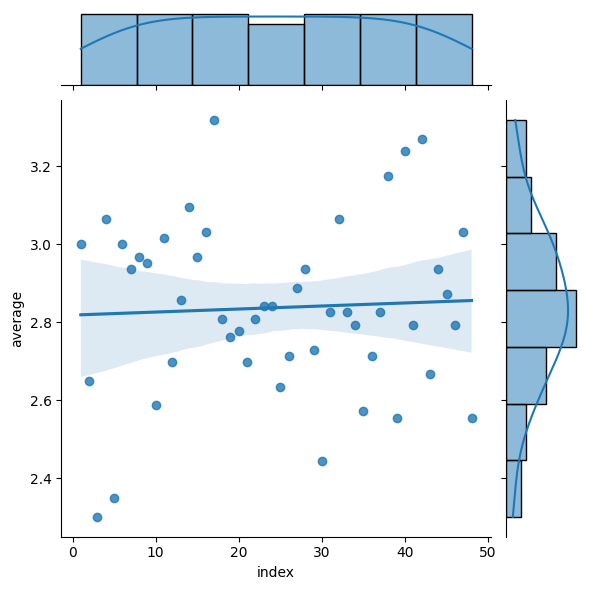

In [ ]:
sns.jointplot(data=date_average_mortgage_true_df, y='average', x='index', kind='reg')

## Extract the data set for classification and replace the labels.

In [ ]:
customers_new1=customers_new[['convenience','customer_service','online_banking','interest_rates','fees_charges','community_involvement','products_services','privacy_security','reputation','satisfied']].reset_index()
customers_new1=customers_new1.drop(columns='index')
customers_new1=customers_new1.rename(columns={'satisfied':'attitude'})
customers_new1.loc[customers_new1.attitude==True, 'attitude'] = 'satisfied'
customers_new1.loc[customers_new1.attitude==False, 'attitude'] = 'dissatisfied'
customers_new1

,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,attitude
0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,satisfied
1,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,satisfied
2,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,dissatisfied
3,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,satisfied
4,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0,satisfied
...,...,...,...,...,...,...,...,...,...,...
1086,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0,satisfied
1087,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0,satisfied
1088,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,dissatisfied
1089,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,satisfied


## Extract numerical data.

In [ ]:
data=customers_new1.iloc[:,0:9]
data

,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0
1,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0
2,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0
3,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
4,5.0,4.0,1.0,4.0,4.0,4.0,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
1086,2.0,2.0,5.0,5.0,3.0,4.0,3.0,3.0,5.0
1087,1.0,1.0,3.0,3.0,4.0,5.0,4.0,5.0,3.0
1088,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0
1089,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0


## Extract target data.

In [ ]:
target=customers_new1.iloc[:,9]
target

0          satisfied
1          satisfied
2       dissatisfied
3          satisfied
4          satisfied
            ...     
1086       satisfied
1087       satisfied
1088    dissatisfied
1089       satisfied
1090       satisfied
Name: attitude, Length: 1091, dtype: object

## Use a knn classifier to classify attitudes into satisfactory and unsatisfactory labels, and finally accuracy is calculated.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
train_data, test_data, train_target, test_target=train_test_split(data, target, test_size=0.2)
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(train_data, train_target)
predicted1 = model1.predict(test_data)
print(predicted1)
print(accuracy_score(test_target, predicted1))

['satisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'satisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'satisfied' 'satisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'satisfied'
 'satisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'satisfied' 'satisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'satisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'satisfied'
 'satisfied' 'dissat

## Show the specific prediction results in a table.

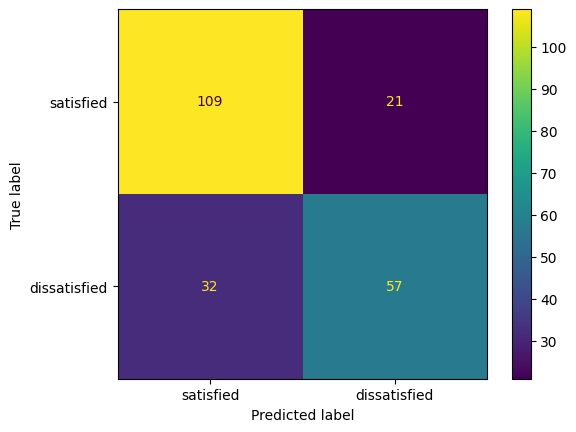

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,roc_curve
target_categories = ["satisfied","dissatisfied"]

cm = confusion_matrix(test_target, predicted1)

cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Call a decision tree classifier to classify user satisfaction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(train_data, train_target)
predicted2 = model2.predict(test_data)
print(predicted2)
print(accuracy_score(test_target, predicted2))


['dissatisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied'
 'satisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'satisfied' 'dissatisfied'
 'satisfied' 'satisfied' 'satisfied' 'dissatisfied' 'dissatisfied'
 'satisfied' 'satisfied' 'dissatisfied' 'satisfied' 'satisfied'
 'satisfied' 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied'
 'satisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'satisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'satisfied' 'satisfied' 'satisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'satisfied' 'dissatisfied' 'satisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'dissatisfied' 'dissatisfied'
 'dissatisfied' 'dissatisfied' 'satisfied' 'satisfied' 'dissatisfied'
 'dissatisfied' 'satisfied' 'dissatisfied' 'dissatisfied' 'satisfied'
 'dissatisfied' 'dissatisfied' 'dis

## Graphically demonstrate the specific forecast results.

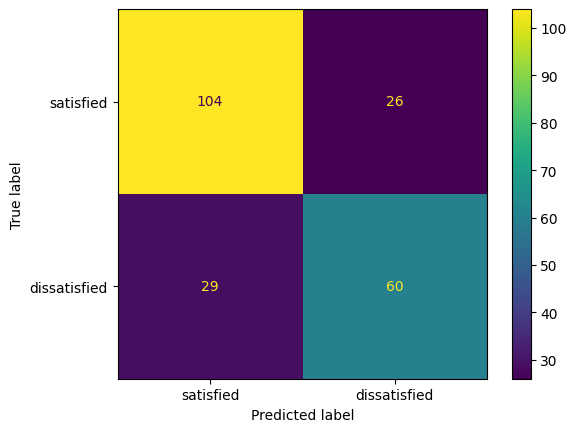

In [ ]:
cm = confusion_matrix(test_target, predicted2)
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

In [ ]:
print("KNN")
print("\n")
print(classification_report(test_target, predicted1, target_names=target_categories))

print("\n")
print("Decision Tree")
print("\n")
print(classification_report(test_target, predicted2, target_names=target_categories))

KNN


              precision    recall  f1-score   support

   satisfied       0.77      0.84      0.80       130
dissatisfied       0.73      0.64      0.68        89

    accuracy                           0.76       219
   macro avg       0.75      0.74      0.74       219
weighted avg       0.76      0.76      0.75       219



Decision Tree


              precision    recall  f1-score   support

   satisfied       0.78      0.80      0.79       130
dissatisfied       0.70      0.67      0.69        89

    accuracy                           0.75       219
   macro avg       0.74      0.74      0.74       219
weighted avg       0.75      0.75      0.75       219



In [ ]:
pred_prob1 = model1.predict_proba(test_data)
pred_prob2 = model2.predict_proba(test_data)


auc_1 = roc_auc_score(test_target, pred_prob1[:,1])
auc_2 = roc_auc_score(test_target, pred_prob2[:,1])

auc_scores = {}

print('AUC_Score for KNN Classifier: %.2f%%' % (auc_1 * 100))
print('AUC_Score for Decision Tree Classifier: %.2f%%' % (auc_2 * 100))

auc_scores['KNN'] = auc_1
auc_scores['Decision Tree'] = auc_2

AUC_Score for KNN Classifier: 82.26%
AUC_Score for Decision Tree Classifier: 73.71%


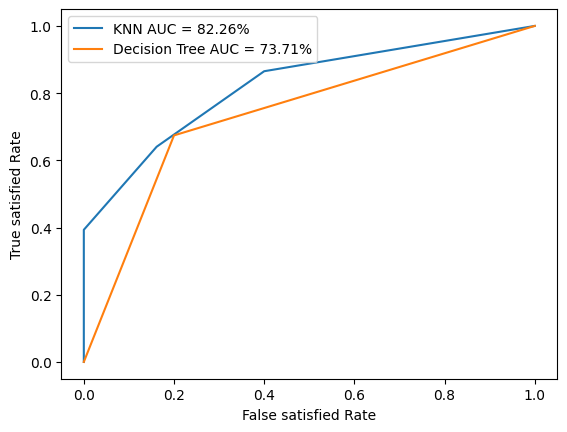

In [ ]:
fpr_1, tpr_1, _ = roc_curve(test_target,pred_prob1[:,1], pos_label = 'satisfied')
fpr_2, tpr_2, _ = roc_curve(test_target,pred_prob2[:,1], pos_label = 'satisfied')

plt.plot(fpr_1,tpr_1, label='KNN AUC = %.2f%%'%(auc_scores['KNN']*100))
plt.plot(fpr_2,tpr_2, label='Decision Tree AUC = %.2f%%'%(auc_scores['Decision Tree']*100))


plt.ylabel('True satisfied Rate')
plt.xlabel('False satisfied Rate')
plt.legend()
plt.show()



*   In terms of precision, the KNN classifier is more accurate in classifying people with dissatisfied attitudes, while the decision tree classifier is more accurate in classifying people with satisfied attitudes.
*   In terms of recall, the KNN classifier is much better than the decision tree in classifying people with satisfied attitudes, while the decision tree is slightly better than the KNN classifier in classifying people with unsatisfied attitudes.
*   The KNN classifier is slightly better at sorting the models in terms of AUG scores.


## Retrieve the text comment content of the second table.

In [ ]:
customers_comment=pd.read_csv("bank-comments.csv",delimiter='\t')
customers_comment=customers_comment[['comments']]
customers_comment

,comments
0,"Overal, this bank is satisfactory."
1,Easy to find zhe bank ' s branches and ATMs. A...
2,Bank's phone app is really great. In general a...
3,NaN
4,NaN
...,...
2995,No comment
2996,Online banking is really good
2997,customer service quality from this bank is ter...
2998,Great to see that my bank supports local sport...


## Splice two dataframes.

In [ ]:
customers_comment_new = pd.concat([customers,customers_comment], axis=1, join='outer')
customers_comment_new = customers_comment_new.dropna()
customers_comment_new.loc[customers_comment_new.customer_gender=='f', 'customer_gender'] = 'Female'
customers_comment_new.loc[customers_comment_new.customer_gender=='m', 'customer_gender'] = 'Male'
customers_comment_new = customers_comment_new[['satisfied','comments']]
customers_comment_new = customers_comment_new.rename(columns={'satisfied':'attitude'})
customers_comment_new.loc[customers_comment_new.attitude==True, 'attitude'] = 'satisfied'
customers_comment_new.loc[customers_comment_new.attitude==False, 'attitude'] = 'dissatisfied'
customers_comment_new = customers_comment_new.reset_index()
customers_comment_new.drop(columns='index',inplace=True)
customers_comment_new

,attitude,comments
0,satisfied,"Overal, this bank is satisfactory."
1,satisfied,Easy to find zhe bank ' s branches and ATMs. A...
2,satisfied,i guess that my bank is committed to sustainab...
3,dissatisfied,Its time für your bank to make meaningful chan...
4,satisfied,It' ' s important ho me that my bank is [[comm...
...,...,...
1005,satisfied,"So summarise, I ' m reasonably pleased."
1006,satisfied,your mobile apples seems to have good security...
1007,dissatisfied,No comment
1008,satisfied,Online banking is really good


## Split the dataset.

In [ ]:
target = customers_comment_new['attitude']
target = target.values.tolist()
customers_comment_new.drop('attitude',inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(customers_comment_new,target, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,comments
984,Savings rates are competitive.
479,It's hard to find ATMs for this bank. Might cl...
47,The banks online platform is really impressive...
528,The bank provides services that are excellent ...
644,Outrageous charges for basic banking services....
...,...
767,Your bank needs to step up and demonstrate gre...
72,thinking of closing my account...
908,The services tkat this bank offerts are top - ...
235,Your bank ' s customer serivice is unprofessio...


## Pick out words from the text and convert them to lowercase.

In [ ]:
X_train['comments'] = X_train['comments'].str.lower()
tokenize = CountVectorizer().build_tokenizer()
X_train['Tokens'] = X_train.apply(lambda row: tokenize(row['comments']), axis=1)

X_test['comments'] = X_test['comments'].str.lower()
X_test['Tokens'] = X_test.apply(lambda row: tokenize(row['comments']), axis=1)


In [ ]:
X_train.head()

,comments,Tokens
984,savings rates are competitive.,"[savings, rates, are, competitive]"
479,it's hard to find atms for this bank. might cl...,"[it, hard, to, find, atms, for, this, bank, mi..."
47,the banks online platform is really impressive...,"[the, banks, online, platform, is, really, imp..."
528,the bank provides services that are excellent ...,"[the, bank, provides, services, that, are, exc..."
644,outrageous charges for basic banking services....,"[outrageous, charges, for, basic, banking, ser..."


In [ ]:
X_test.head()

,comments,Tokens
915,the level of customer service provided by this...,"[the, level, of, customer, service, provided, ..."
701,the service provided by this bank is very disa...,"[the, service, provided, by, this, bank, is, v..."
293,i had a positive experience with the bank's cu...,"[had, positive, experience, with, the, bank, c..."
507,this bank's fees are not transparent.,"[this, bank, fees, are, not, transparent]"
970,nothing to comment...,"[nothing, to, comment]"


## Remove various stop words.

In [ ]:
stopwords = text.ENGLISH_STOP_WORDS

def remove_stopwords(row):
    tokens = row['Tokens']
    tokens  = [w for w in tokens if w not in stopwords]
    return tokens

X_train['tokens_clean'] = X_train.apply(remove_stopwords, axis=1)

X_test['tokens_clean'] = X_test.apply(remove_stopwords, axis=1)


In [ ]:
X_train.head()

,comments,Tokens,tokens_clean
984,savings rates are competitive.,"[savings, rates, are, competitive]","[savings, rates, competitive]"
479,it's hard to find atms for this bank. might cl...,"[it, hard, to, find, atms, for, this, bank, mi...","[hard, atms, bank, close, account]"
47,the banks online platform is really impressive...,"[the, banks, online, platform, is, really, imp...","[banks, online, platform, really, impressive, ..."
528,the bank provides services that are excellent ...,"[the, bank, provides, services, that, are, exc...","[bank, provides, services, excellent, meet, ne..."
644,outrageous charges for basic banking services....,"[outrageous, charges, for, basic, banking, ser...","[outrageous, charges, basic, banking, services..."


In [ ]:
X_test.head()

,comments,Tokens,tokens_clean
915,the level of customer service provided by this...,"[the, level, of, customer, service, provided, ...","[level, customer, service, provided, bank, notch]"
701,the service provided by this bank is very disa...,"[the, service, provided, by, this, bank, is, v...","[service, provided, bank, disappointing, negat..."
293,i had a positive experience with the bank's cu...,"[had, positive, experience, with, the, bank, c...","[positive, experience, bank, customer, service..."
507,this bank's fees are not transparent.,"[this, bank, fees, are, not, transparent]","[bank, fees, transparent]"
970,nothing to comment...,"[nothing, to, comment]",[comment]


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Lemmatize the words.

In [ ]:
lemmatizer = WordNetLemmatizer()
def get_lemmatizer_list(row):
    word_list = row['tokens_clean']
    lemmatized_word_list = [lemmatizer.lemmatize(word) for word in word_list]
    return lemmatized_word_list

X_train['lemmatized_words'] = X_train.apply(get_lemmatizer_list, axis=1)

X_test['lemmatized_words'] = X_test.apply(get_lemmatizer_list, axis=1)

In [ ]:
X_train.head()

,comments,Tokens,tokens_clean,lemmatized_words
984,savings rates are competitive.,"[savings, rates, are, competitive]","[savings, rates, competitive]","[saving, rate, competitive]"
479,it's hard to find atms for this bank. might cl...,"[it, hard, to, find, atms, for, this, bank, mi...","[hard, atms, bank, close, account]","[hard, atm, bank, close, account]"
47,the banks online platform is really impressive...,"[the, banks, online, platform, is, really, imp...","[banks, online, platform, really, impressive, ...","[bank, online, platform, really, impressive, i..."
528,the bank provides services that are excellent ...,"[the, bank, provides, services, that, are, exc...","[bank, provides, services, excellent, meet, ne...","[bank, provides, service, excellent, meet, nee..."
644,outrageous charges for basic banking services....,"[outrageous, charges, for, basic, banking, ser...","[outrageous, charges, basic, banking, services...","[outrageous, charge, basic, banking, service, ..."


In [ ]:
X_test.head()

,comments,Tokens,tokens_clean,lemmatized_words
915,the level of customer service provided by this...,"[the, level, of, customer, service, provided, ...","[level, customer, service, provided, bank, notch]","[level, customer, service, provided, bank, notch]"
701,the service provided by this bank is very disa...,"[the, service, provided, by, this, bank, is, v...","[service, provided, bank, disappointing, negat...","[service, provided, bank, disappointing, negat..."
293,i had a positive experience with the bank's cu...,"[had, positive, experience, with, the, bank, c...","[positive, experience, bank, customer, service...","[positive, experience, bank, customer, service..."
507,this bank's fees are not transparent.,"[this, bank, fees, are, not, transparent]","[bank, fees, transparent]","[bank, fee, transparent]"
970,nothing to comment...,"[nothing, to, comment]",[comment],[comment]


## Connect the words into sentences.

In [ ]:
def get_strings_sentences(row):
    my_list = row['lemmatized_words']
    sentence = ' '.join(word for word in my_list)
    return sentence

X_train['words'] = X_train.apply(get_strings_sentences, axis=1)
X_test['words'] = X_test.apply(get_strings_sentences, axis=1)

In [ ]:
X_train.head()

,comments,Tokens,tokens_clean,lemmatized_words,words
984,savings rates are competitive.,"[savings, rates, are, competitive]","[savings, rates, competitive]","[saving, rate, competitive]",saving rate competitive
479,it's hard to find atms for this bank. might cl...,"[it, hard, to, find, atms, for, this, bank, mi...","[hard, atms, bank, close, account]","[hard, atm, bank, close, account]",hard atm bank close account
47,the banks online platform is really impressive...,"[the, banks, online, platform, is, really, imp...","[banks, online, platform, really, impressive, ...","[bank, online, platform, really, impressive, i...",bank online platform really impressive im sati...
528,the bank provides services that are excellent ...,"[the, bank, provides, services, that, are, exc...","[bank, provides, services, excellent, meet, ne...","[bank, provides, service, excellent, meet, nee...",bank provides service excellent meet need bank...
644,outrageous charges for basic banking services....,"[outrageous, charges, for, basic, banking, ser...","[outrageous, charges, basic, banking, services...","[outrageous, charge, basic, banking, service, ...",outrageous charge basic banking service thorou...


In [ ]:
X_test.head()

,comments,Tokens,tokens_clean,lemmatized_words,words
915,the level of customer service provided by this...,"[the, level, of, customer, service, provided, ...","[level, customer, service, provided, bank, notch]","[level, customer, service, provided, bank, notch]",level customer service provided bank notch
701,the service provided by this bank is very disa...,"[the, service, provided, by, this, bank, is, v...","[service, provided, bank, disappointing, negat...","[service, provided, bank, disappointing, negat...",service provided bank disappointing negative e...
293,i had a positive experience with the bank's cu...,"[had, positive, experience, with, the, bank, c...","[positive, experience, bank, customer, service...","[positive, experience, bank, customer, service...",positive experience bank customer service over...
507,this bank's fees are not transparent.,"[this, bank, fees, are, not, transparent]","[bank, fees, transparent]","[bank, fee, transparent]",bank fee transparent
970,nothing to comment...,"[nothing, to, comment]",[comment],[comment],comment


In [ ]:
X_train = X_train[['words']]
X_test = X_test[['words']]

In [ ]:
X_train

,words
984,saving rate competitive
479,hard atm bank close account
47,bank online platform really impressive im sati...
528,bank provides service excellent meet need bank...
644,outrageous charge basic banking service thorou...
...,...
767,bank need step demonstrate greater environment...
72,thinking closing account
908,service tkat bank offerts notch pretty good
235,bank customer serivice unprofessional tsis ban...


In [ ]:
X_test

,words
915,level customer service provided bank notch
701,service provided bank disappointing negative e...
293,positive experience bank customer service over...
507,bank fee transparent
970,comment
...,...
759,bank active role yn preserving environment rea...
599,bank offer service heed happy recommend freinds
902,comment
426,


## Select the most suitable vector parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df = 3, max_df = 0.85)

X_train = vectorizer.fit_transform(X_train['words'])

X_test = vectorizer.transform(X_test['words'])

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model_1=LogisticRegression()
logreg_cv=GridSearchCV(model_1,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters",logreg_cv.best_params_)
print("accuracy:",logreg_cv.best_score_)

best parameters {'C': 10.0, 'penalty': 'l2'}
accuracy: 0.9220216049382716


## Predict the results.

In [ ]:
model_1 = LogisticRegression(C=10,penalty="l2")
model_1.fit(X_train, y_train)

y_pred_lr = model_1.predict(X_test)
y_pred_lr

array(['dissatisfied', 'dissatisfied', 'satisfied', 'satisfied',
       'dissatisfied', 'dissatisfied', 'dissatisfied', 'satisfied',
       'dissatisfied', 'dissatisfied', 'satisfied', 'dissatisfied',
       'satisfied', 'satisfied', 'satisfied', 'satisfied', 'satisfied',
       'satisfied', 'satisfied', 'satisfied', 'satisfied', 'dissatisfied',
       'satisfied', 'dissatisfied', 'dissatisfied', 'satisfied',
       'dissatisfied', 'dissatisfied', 'dissatisfied', 'satisfied',
       'dissatisfied', 'dissatisfied', 'satisfied', 'dissatisfied',
       'satisfied', 'dissatisfied', 'satisfied', 'dissatisfied',
       'satisfied', 'dissatisfied', 'satisfied', 'dissatisfied',
       'dissatisfied', 'dissatisfied', 'dissatisfied', 'satisfied',
       'dissatisfied', 'satisfied', 'dissatisfied', 'dissatisfied',
       'satisfied', 'satisfied', 'dissatisfied', 'dissatisfied',
       'dissatisfied', 'satisfied', 'dissatisfied', 'dissatisfied',
       'dissatisfied', 'satisfied', 'dissatisfied', 

## Use graphs to show the individual quantities predicted.

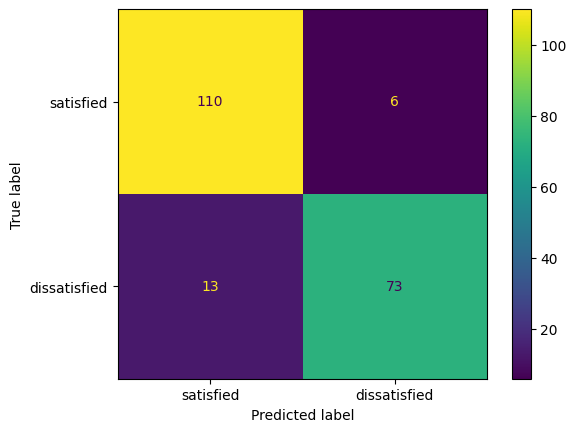

In [ ]:
target_categories = ["satisfied","dissatisfied"]

cm = confusion_matrix(y_test, y_pred_lr)

cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Select the appropriate vector parameters.

In [ ]:
grid = {
    'n_estimators': [100, 200, 500],
    'criterion' :['gini', 'entropy']
}
model_2=RandomForestClassifier()
rfc_cv=GridSearchCV(model_2,grid,cv=3)
rfc_cv.fit(X_train,y_train)

print("best parameters) ",rfc_cv.best_params_)
print("accuracy:",rfc_cv.best_score_)

best parameters)  {'criterion': 'gini', 'n_estimators': 500}
accuracy: 0.8762586626279315


## Use graphs to show the individual quantities predicted.

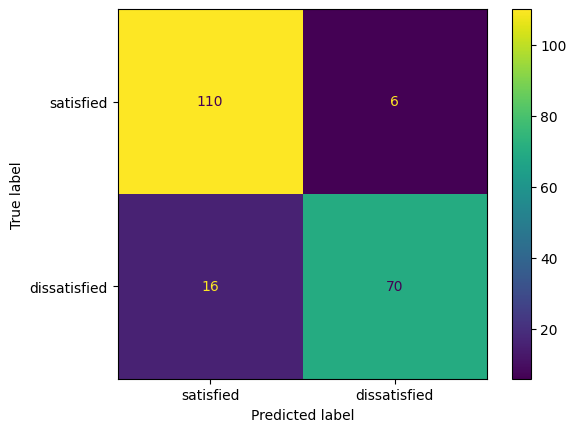

In [ ]:
model_2 = RandomForestClassifier(n_estimators=500,criterion="entropy")
model_2.fit(X_train, y_train)

y_pred_rf = model_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Calculate various accuracies for the classification of both classifiers.

In [ ]:
print("Logistic Regression")
print("\n")
print(classification_report(y_test, y_pred_lr, target_names=target_categories))

print("\n")
print("Random Forest")
print("\n")
print(classification_report(y_test, y_pred_rf, target_names=target_categories))

Logistic Regression


              precision    recall  f1-score   support

   satisfied       0.89      0.95      0.92       116
dissatisfied       0.92      0.85      0.88        86

    accuracy                           0.91       202
   macro avg       0.91      0.90      0.90       202
weighted avg       0.91      0.91      0.91       202



Random Forest


              precision    recall  f1-score   support

   satisfied       0.87      0.95      0.91       116
dissatisfied       0.92      0.81      0.86        86

    accuracy                           0.89       202
   macro avg       0.90      0.88      0.89       202
weighted avg       0.89      0.89      0.89       202



## Draw the AUG graph to easily see the efficiency of the two classifiers.

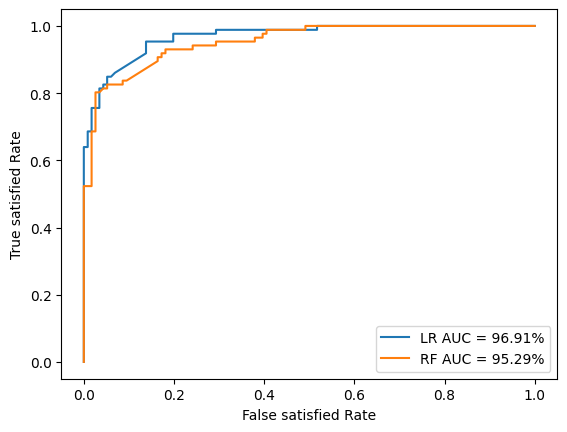

In [ ]:
pred_prob1 = model_1.predict_proba(X_test)
pred_prob2 = model_2.predict_proba(X_test)


auc_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_2 = roc_auc_score(y_test, pred_prob2[:,1])

auc_scores = {}

auc_scores['LR'] = auc_1
auc_scores['RF'] = auc_2

fpr_1, tpr_1, _ = roc_curve(y_test,pred_prob1[:,1], pos_label = 'satisfied')
fpr_2, tpr_2, _ = roc_curve(y_test,pred_prob2[:,1], pos_label = 'satisfied')

plt.plot(fpr_1,tpr_1, label='LR AUC = %.2f%%'%(auc_scores['LR']*100))
plt.plot(fpr_2,tpr_2, label='RF AUC = %.2f%%'%(auc_scores['RF']*100))


plt.ylabel('True satisfied Rate')
plt.xlabel('False satisfied Rate')
plt.legend()
plt.show()



*   The two classifiers differ only slightly in their classification of dissatisfied users. logistic regression is more accurate than random forest, i.e. logistic regression classifies more completely.
*   From the AUG plot lines, the two classifiers overlap highly, implying that the two classifiers rank the models essentially similarly.

